In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import pickle
import numpy as np
print('NumPy version:', np.__version__)
import pandas as pd
print('Pandas version:', pd.__version__)
pd.options.display.max_columns = None

import matplotlib as mpl
print('Matplotlib version:', mpl.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

NumPy version: 1.14.3
Pandas version: 0.23.0
Matplotlib version: 2.2.2


In [2]:
# Load efficiency
eff_df = pd.read_csv('../data/efficiency.gz', header=None, na_values=-1, compression='gzip')
print(eff_df.shape)
eff_df.head()

(15647, 85)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.111111,0.0,0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.312500,NaN,NaN,NaN,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.583333,NaN,NaN,NaN,NaN,0.266667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.318182,NaN,NaN,0.1875,NaN,0.307692,NaN,NaN,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,NaN,0.153846,NaN,NaN,NaN,NaN,NaN,NaN,0.177778,0.125000,NaN,NaN,0.067227,NaN,0.363636,NaN,NaN,0.315789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090909,NaN,NaN,0.147368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.188172,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.252988,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105263,NaN,0.145038,NaN,0.179856,NaN,0.30,NaN,NaN,NaN,NaN,0.183824,0.205128,NaN,NaN,0.000000,NaN,0.288889,NaN,NaN,0.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.248366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090909,NaN,NaN,NaN,NaN,0.208333,NaN,NaN
4,NaN,NaN,NaN,0.142857,NaN,0.263158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118182,NaN,NaN,0.2000,0.125,0.000000,0.090909,0.255952,NaN,0.0,0.166667,NaN,NaN,NaN,0.305085,NaN,0.216216,NaN,0.157895,NaN,NaN,NaN,0.25,NaN,NaN,0.352941,NaN,0.210526,0.200000,0.196078,NaN,NaN,NaN,0.163380,0.269231,NaN,0.169811,0.090909,0.169082,NaN,NaN,NaN,NaN,NaN,NaN,0.174603,NaN,NaN,NaN,NaN,0.181818,0.076923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.128205,NaN,0.212121


In [3]:
# Load number of clicks
nclaims_df = pd.read_csv('../data/nimpressions.gz', header=None, na_values=-1, compression='gzip')
print(nclaims_df.shape)
nclaims_df.head()

(15647, 85)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,18.0,13.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,16.0,NaN,13.0,NaN,NaN,288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,39.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,16.0,NaN,NaN,119.0,NaN,11.0,NaN,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,502.0,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,NaN,131.0,NaN,278.0,NaN,10.0,NaN,NaN,NaN,NaN,136.0,39.0,NaN,NaN,10.0,NaN,180.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,306.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,24.0,NaN,NaN
4,NaN,NaN,NaN,14.0,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,NaN,NaN,20.0,16.0,16.0,11.0,336.0,NaN,10.0,24.0,NaN,NaN,NaN,59.0,NaN,37.0,NaN,19.0,NaN,NaN,NaN,16.0,NaN,NaN,17.0,NaN,19.0,15.0,51.0,NaN,NaN,NaN,355.0,26.0,NaN,53.0,11.0,207.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,NaN,NaN,11.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,33.0


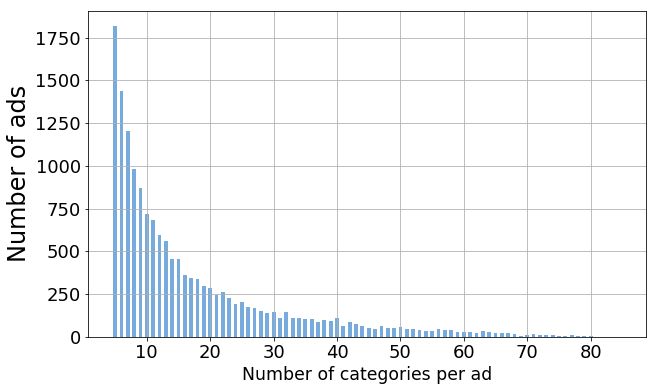

In [4]:
# num categories per ad
data = eff_df.count(axis=1)
d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2

f, ax = plt.subplots(figsize=(10,6))
ax.hist(data, 0.6/3+np.arange(left_of_first_bin, right_of_last_bin + d, d), width=0.6, color=(119/255,170/255,221/255))
ax.set_xlabel('Number of categories per ad', fontsize='xx-large')
ax.set_ylabel('Number of ads', fontsize='24')
plt.xticks(fontsize='18')
plt.yticks(fontsize='18')
ax.grid()

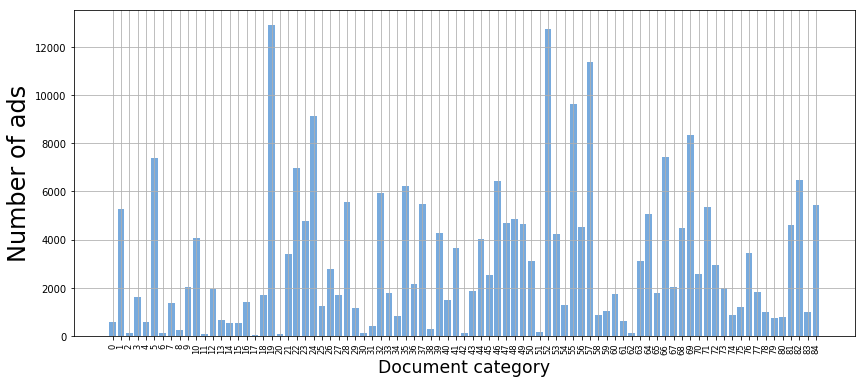

In [9]:
# num ads per category
data = eff_df.count(axis=0)

f, ax = plt.subplots(figsize=(14,6))
ax.bar(data.index, data.values, color=(119/255,170/255,221/255))
ax.set_xlabel('Document category', fontsize='xx-large')
ax.set_ylabel('Number of ads', fontsize='24')
ax.set_xticks(np.arange(len(data.index)))
ax.set_xticklabels([str(i) for i in range(eff_df.shape[1])], 
                   rotation='90', fontsize='small')
ax.grid()

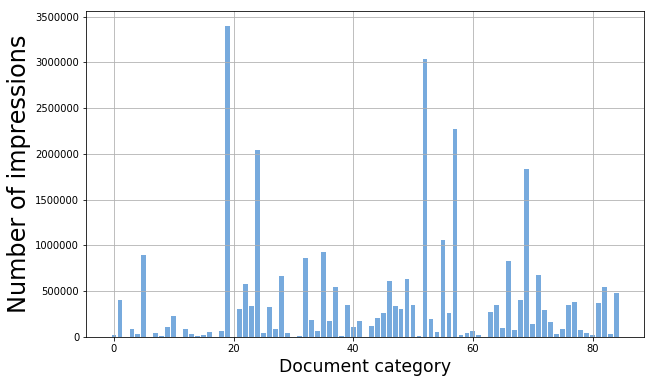

In [11]:
# num displays per cat
data = nclaims_df.sum(axis=0)

f, ax = plt.subplots(figsize=(10,6))
ax.bar(data.index, data.values, color=(119/255,170/255,221/255))
ax.set_xlabel('Document category', fontsize='xx-large')
ax.set_ylabel('Number of impressions', fontsize=24)
ax.grid()

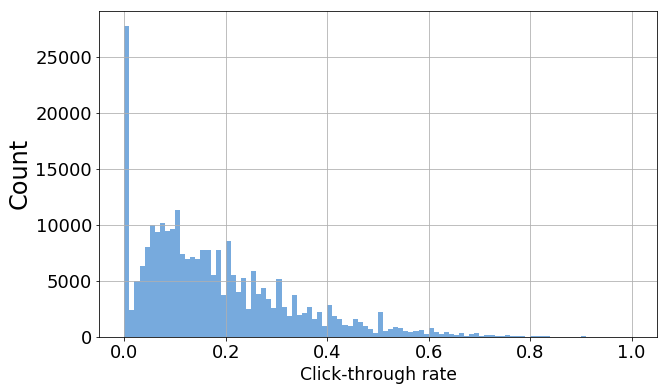

In [12]:
# artist-discipline efficiency distribution
a = [e for arr in eff_df.values for e in arr if e>=0]

f, ax = plt.subplots(figsize=(10,6))
n, bins, patches = ax.hist(a, 100, log=False, color=(119/255,170/255,221/255))
ax.set_xlabel('Click-through rate', fontsize='xx-large')
ax.set_ylabel('Count', fontsize='24')
plt.xticks(fontsize='18')
plt.yticks(fontsize='18')
ax.grid()

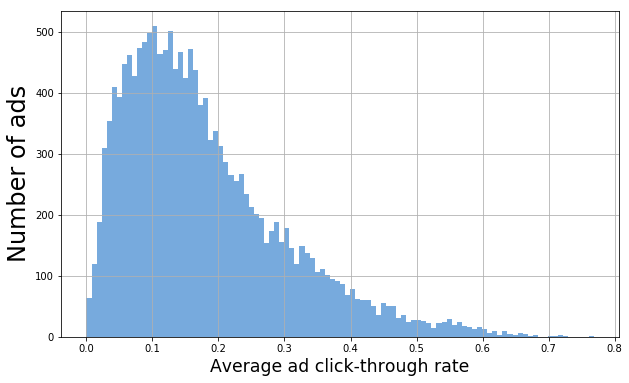

In [22]:
# avg efficiency per user
data = eff_df.mean(axis=1)

f, ax = plt.subplots(figsize=(10,6))
ax.hist(data.values, 100, color=(119/255,170/255,221/255))
ax.set_xlabel('Average ad click-through rate', fontsize='xx-large')
ax.set_ylabel('Number of ads', fontsize=24)
ax.grid()

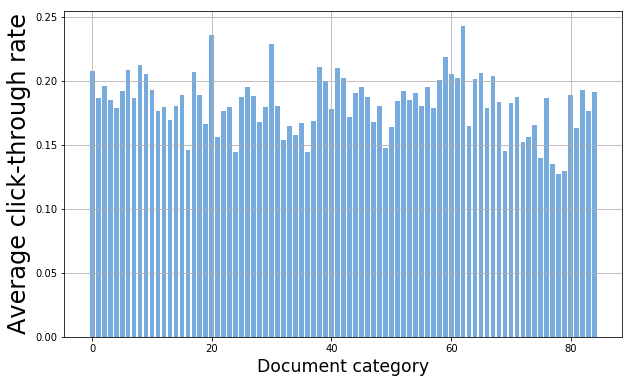

In [14]:
# avg efficiency per disc
data = eff_df.mean(axis=0)

f, ax = plt.subplots(figsize=(10,6))
ax.bar(data.index, data.values, color=(119/255,170/255,221/255))
ax.set_xlabel('Document category', fontsize='xx-large')
ax.set_ylabel('Average click-through rate', fontsize=24)
ax.grid()

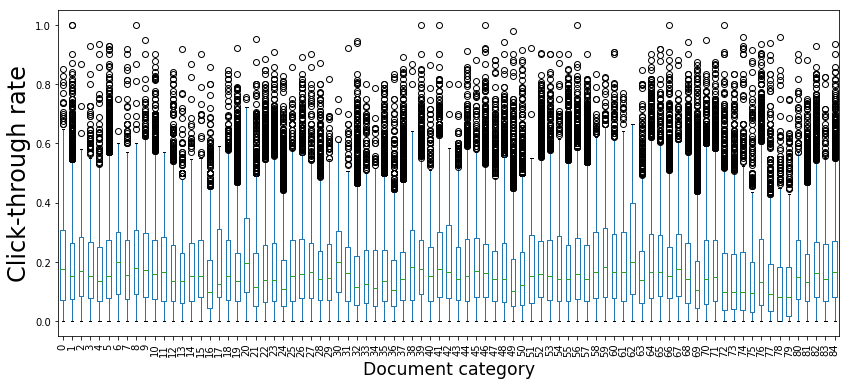

In [16]:
# box eff per disc
data = eff_df

f, ax = plt.subplots(figsize=(14,6))
data.boxplot(ax=ax, rot=90)
ax.set_xlabel('Document category', fontsize='xx-large')
ax.set_ylabel('Click-through rate', fontsize=24)
ax.grid()

In [19]:
bin_m = nclaims_df.values > 0
print(bin_m.shape)

(15647, 85)


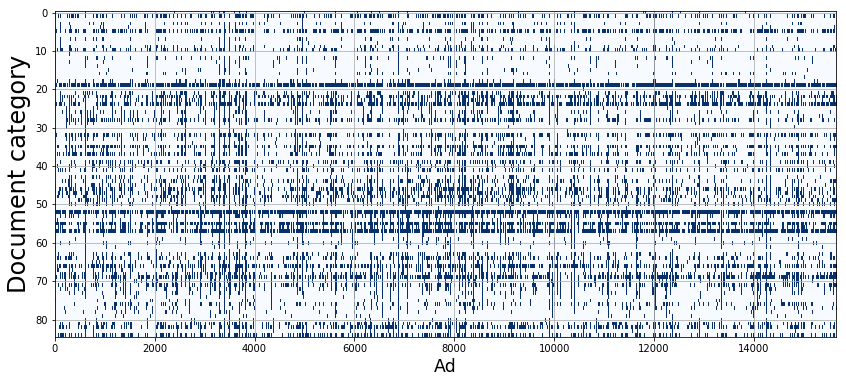

In [23]:
f, ax = plt.subplots(figsize=(14,6))
ax.imshow(bin_m.T, aspect='auto', cmap='Blues');
ax.set_xlabel('Ad', fontsize='xx-large')
ax.set_ylabel('Document category', fontsize=24)
ax.grid()

min: 10 	max: 20818


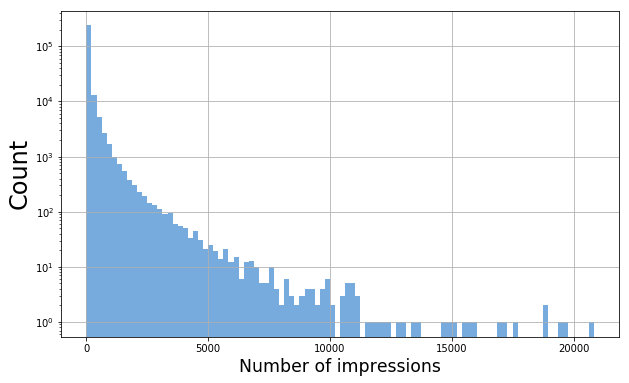

In [21]:
# Number of claims distribution
a = [e for arr in nclaims_df.values for e in arr if e>0]
print('min: %d' % min(a), '\tmax: %d' % max(a))

f, ax = plt.subplots(figsize=(10,6))
n, bins, patches = ax.hist(a, 100, color=(119/255,170/255,221/255))
ax.set_xlabel('Number of impressions', fontsize='xx-large')
ax.set_ylabel('Count', fontsize=24)
ax.grid()
ax.set_yscale('log')